In [1]:
import matplotlib
%matplotlib tk
%autosave 180
%load_ext autoreload
%autoreload 2

import nest_asyncio

%config Completer.use_jedi = False

#
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 
import matplotlib.cm as cm
import numpy as np
import os
from tqdm import tqdm

#
import sys
sys.path.append('/home/cat/code/gerbil/')

# 
from utils.cohort import cohort as Cohort
from utils.track import track
from utils.convert import convert
from utils.ethogram import ethogram
#from utils.database import database
from utils.ethogram import ethogram

Autosaving every 180 seconds


/home/cat/miniconda3/envs/sleap_new/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
######################################################
############# LOAD ANIMAL DATABASE ###################
######################################################
fname_spreadsheet = '/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort4/database.xlsx'
#fname_spreadsheet = '/media/cat/4TBSSD/dan/cohort2/P21_P28/database.xlsx'

#
cohort = Cohort.CohortProcessor(fname_spreadsheet)
#cohort.fname_spreadsheet = '/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/database.xlsx'
cohort.load_database()



DF:     Unnamed: 0  Cohort NN Type                                   Filename Dev Day  # of Gerbils Time of Light Switch  Shaved?  Predicted?                                   Slp filename Start time
0           0       4     Day  2020_09_22_14_09_44_904384_compressed.mp4     P15             6                  NaN        1           1  2020_09_22_14_09_44_904384_compressed_Day.slp   14:09:44
1           1       4     Day  2020_09_22_15_16_28_547483_compressed.mp4     P15             6                  NaN        1           1  2020_09_22_15_16_28_547483_compressed_Day.slp   15:16:28
2           2       4     Day  2020_09_22_16_23_20_653413_compressed.mp4     P15             6                  NaN        1           1  2020_09_22_16_23_20_653413_compressed_Day.slp   16:23:20
3           3       4     Day  2020_09_22_17_30_03_197326_compressed.mp4     P15             6                  NaN        1           1  2020_09_22_17_30_03_197326_compressed_Day.slp   17:30:03
4           4       

In [14]:
######################################################
########## TIME IN PROXIMITY BEHAVIOR ################
######################################################
#
def compute_proximity_parallel(pair, 
                              cohort):
    
    #
    cohort.animal_ids = [pair[0],pair[1]]

    #
    cohort.get_pairwise_interaction_time_nohuddle(pair[0],
                                                  pair[1])

    #
    cohort.format_behavior()

    #
    ethogram.generate_ethogram_hourly( 
                                      behavior_name,
                                      cohort,
                                      cohort.exclude_huddles)
    #
    return cohort.data

#
import parmap

#
cohort.track_type = 'features'
cohort.exclude_huddles = True
cohort.recompute = True

#
cohort.video_scaling_factor = 1.0
if 'cohort3' in fname_spreadsheet or 'cohort4' in fname_spreadsheet:
    cohort.video_scaling_factor = 1.3

#
behavior_name = 'pairwise_proximity'

# select animals
# cohort.animal_ids = [2,3] #,2,3,4,5]
cohort.animal_ids = np.arange(6)

all_pairs = [(a, b) for idx, a in enumerate(cohort.animal_ids) for b in cohort.animal_ids[idx + 1:]]
print ("# of pairs: ", all_pairs)

#
print ("video scaling factor: ", cohort.video_scaling_factor)

#                
if True:
    res = parmap.map(compute_proximity_parallel,
                                     all_pairs, 
                                     cohort,
                                     pm_processes=20,
                                     pm_pbar=True)            
#                                                            
else:
    #
    for pair in tqdm(all_pairs):

        cohort.animal_ids = [pair[0],pair[1]]

        #
        cohort.get_pairwise_interaction_time_nohuddle(pair[0],
                                                      pair[1])

        #
        cohort.format_behavior()

        #
        ethogram.generate_ethogram_hourly( 
                                          behavior_name,
                                          cohort,
                                          cohort.exclude_huddles)
        
        break
        
print ("...DONE....")

# of pairs:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
video scaling factor:  1.3


100%|███████████████████████████████████████████| 15/15 [00:35<00:00,  2.35s/it]

...DONE....


In [15]:
# ##################################################################
# ####### SHOW PAIRWISE PROXIMITY IMAGE PLOTS 24hrs x 15days #######
# ##################################################################

# Not used so much now...
if False:
    for pair in all_pairs:

        cohort.animal_ids = [pair[0],pair[1]]

        cohort.exclude_huddles = True
        ethogram.plot_ethogram_hourly(
                                     behavior_name,
                                     cohort,
                                     cohort.exclude_huddles,
                                     vmax=50)


In [30]:
##################################################################
########## SHOW PAIRWISE PROXIMITY AS DEVELOPMENT CURVES #########
##################################################################
#

# cohort.animal_ids = np.arange(6)

# #
# all_pairs = [(a, b) for idx, a in enumerate(cohort.animal_ids) for b in cohort.animal_ids[idx + 1:]]
# print ("# of pairs: ", all_pairs)
# all_pairs = [[0,1], [3,4]]
# #all_pairs = [[2,3]]
# #
# plt.figure()
# for pair_id in range(len(all_pairs)):

#     cohort.animal_ids = [all_pairs[pair_id][0],all_pairs[pair_id][1]]

#     #
#     ethogram.plot_ethogram_development(
#                                  behavior_name,
#                                  cohort,
#                                  cohort.exclude_huddles,
#                                  vmax=50)
#     #
#     plt.legend()
    
# #
# plt.ylabel("% spent together")
    
# #
# plt.title("Average % time spent together (non-huddle)")
    
# #
# plt.xlabel("PDay")
# plt.show()

In [33]:
##################################################################
########## SHOW PAIRWISE PROXIMITY AS DEVELOPMENT CURVES #########
##################################################################
cohort.root_dir = '/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/pairwise_analysis/'

behavior_name = 'pairwise_proximity'


# same but now for averates

plt.figure()

# plot adults first
cohort.animal_ids = [0,1]

#
fname_in = os.path.join(cohort.root_dir,
                         behavior_name+"_"+str(cohort.animal_ids) +"_excludehuddles_"
                         +str(True)+ '.npy')

img_adult = np.load(fname_in)[::-1]
temp = np.mean(img_adult,1)
#temp = np.median(img_adult,1)

plt.plot(temp, label='adults')

fname_out = os.path.join(root_dir,
                         str(cohort.animal_ids)+'.npy')
np.save(fname_out,
        temp)

#


#################################################
# next do pups
cohort.animal_ids = np.arange(6)

all_pairs = [(a, b) for idx, a in enumerate(cohort.animal_ids) for b in cohort.animal_ids[idx + 1:]]
print ("# of pairs: ", all_pairs)
#all_pairs = [[0,1], [0,3], [3,4]]
#
for pair in all_pairs:
    
    ###################
    # exclude the adults
    if pair[0]==0 or pair[0]==1:
        continue
        
    if pair[1]==1 or pair[1]==1:
        continue

    ######################################
    cohort.animal_ids = [pair[0],pair[1]]
    #
    fname_in = os.path.join(cohort.root_dir,
                             behavior_name+"_"+str(cohort.animal_ids) +"_excludehuddles_"
                             +str(True)+ '.npy')

    img = np.load(fname_in)[::-1]
    print ("img in: : ", img.shape)
    temp = np.mean(img,1)
    #temp = np.median(img, 1)
    
    #
    plt.plot(temp,
             label=str(cohort.animal_ids)
            #
            )
    
    # 
    fname_out = os.path.join(root_dir,
                             str(pair)+'.npy')
    np.save(fname_out,
            temp)

    
plt.ylabel("% spent together in the open field")
    
#
plt.title("Average % time spent together (non-huddle)")

x_labels = np.arange(15,30,1)
plt.xticks(np.arange(15), x_labels)
    
#
plt.xlabel("PDay")

#
plt.legend()
 
#
plt.show()
    
    

# of pairs:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
img in: :  (16, 24)
img in: :  (16, 24)
img in: :  (16, 24)
img in: :  (16, 24)
img in: :  (16, 24)
img in: :  (16, 24)


In [25]:

##################################################################
########## SHOW PAIRWISE PROXIMITY AS DEVELOPMENT CURVES #########
##################################################################
root_dir = '/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort4/'

behavior_name = 'pairwise_proximity'


# same but now for averates

plt.figure()

# plot adults first
cohort.animal_ids = [0,1]

#
fname_in = os.path.join(cohort.root_dir,
                         behavior_name+"_"+str(cohort.animal_ids) +"_excludehuddles_"
                         +str(True)+ '.npy')

img_adult = np.load(fname_in)[::-1]
temp = np.mean(img_adult,0)
#temp = np.median(img_adult,1)

plt.plot(temp, label='adults')

fname_out = os.path.join(root_dir,
                         str(cohort.animal_ids)+'.npy')
np.save(fname_out,
        temp)

#################################################
# next do pups
cohort.animal_ids = np.arange(6)

all_pairs = [(a, b) for idx, a in enumerate(cohort.animal_ids) for b in cohort.animal_ids[idx + 1:]]
print ("# of pairs: ", all_pairs)
#all_pairs = [[0,1], [0,3], [3,4]]
#
for pair in all_pairs:
    
    ###################
    # exclude the adults
    if pair[0]==0 or pair[0]==1:
        if pair[1]!=0 and pair[1]!=1:
            pass
        else:
            continue
    else:
        continue

    ######################################
    cohort.animal_ids = [pair[0],pair[1]]
    #
    fname_in = os.path.join(cohort.root_dir,
                             behavior_name+"_"+str(cohort.animal_ids) +"_excludehuddles_"
                             +str(True)+ '.npy')

    img = np.load(fname_in)[::-1]
    print ("img in: : ", img.shape)
    temp = np.mean(img,0)
    #temp = np.median(img, 0)
    
    #
    plt.plot(temp,
             label=str(cohort.animal_ids)
            #
            )
    
    # 
    fname_out = os.path.join(root_dir,
                             str(pair)+'.npy')
    np.save(fname_out,
            temp)

    
plt.ylabel("% spent together in the open field")
    
#
plt.title("Average % time spent together (non-huddle)")

x_labels = np.arange(0,24,1)
plt.xticks(np.arange(24), x_labels)
    
#
plt.xlabel("Hour of day")

#
plt.legend()
 
#
plt.show()
    


# of pairs:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
img in: :  (16, 24)
img in: :  (16, 24)
img in: :  (16, 24)
img in: :  (16, 24)
img in: :  (16, 24)
img in: :  (16, 24)
img in: :  (16, 24)
img in: :  (16, 24)


In [20]:
plt.figure()
plt.imshow(img_adult,
          vmin=0,
          vmax=5)
    
    
    
plt.show()

In [37]:
animal_ks = [2,3]

plt.figure(figsize=(15,5))
plt.suptitle("Animals: "+str(animal_ks))
for k in range(3):
    ax=plt.subplot(1,3,k+1)
    d = np.load('/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort'+str(k+2)+'/pairwise_proximity_['+str(animal_ks[0])+', '
                +str(animal_ks[1])+']_excludehuddles_True.npy')
    plt.title("cohort: "+str(k+2))
    plt.imshow(d,
              vmin=0,
              vmax=10)

    plt.colorbar()
plt.show()

print (d[:,0])

[1.97321976e+00 4.86071730e-02 3.35620957e-02 7.86973278e-02
 5.39308158e-01 7.98546414e-02 4.14318284e-01 0.00000000e+00
 3.24047820e-02 1.15731364e-02 3.00901547e-01 0.00000000e+00
 0.00000000e+00 2.68427326e+01 0.00000000e+00 0.00000000e+00]


In [4]:
import sleap


In [6]:
fname = '/home/cat/Downloads/2020_09_23_09_06_31_558986_compressed_Day.slp'

#
track = sleap.load_file(fname)


(16, 24)


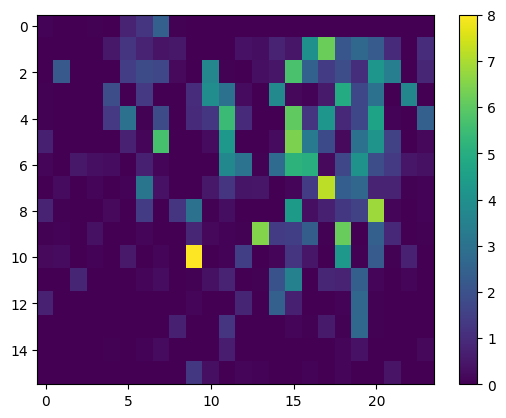

In [6]:
import numpy as np
import matplotlib.pyplot as plt
d = np.load('/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/pairwise_analysis/pairwise_proximity_[2, 3]_excludehuddles_True.npy')

print (d.shape)

plt.figure()

plt.imshow(d,
           aspect='auto')
plt.colorbar()
plt.show()